In [36]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

In [37]:
data_dir = Path("Data")
braemar_dir = Path(data_dir, "Braemar.txt")
heathrow_dir = Path(data_dir, "Heathrow.txt")
save_dir = Path("Figs","Braemar")
SAVE = True

In [38]:
with open(braemar_dir) as f:
    braemar = f.readlines()

In [39]:
header = braemar[0].strip()
braemar = braemar[2:]

In [40]:
def clean_text(input_text:str) -> list[str]:
    split_text = input_text.split(" ")
    newlines_removed = [x.replace("\n", "").replace("Provisional", "") for x in split_text]
    return [x for x in newlines_removed if len(x) > 0]

# Braemar

In [41]:
header = clean_text(header)
braemar_clean = [clean_text(x) for x in braemar]
braemar_df = pd.DataFrame(braemar_clean, columns = header)

In [42]:
braemar_df = braemar_df.replace("---", np.nan)

In [43]:
braemar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   yyyy    770 non-null    object
 1   mm      770 non-null    object
 2   tmax    766 non-null    object
 3   tmin    766 non-null    object
 4   af      766 non-null    object
 5   rain    743 non-null    object
 6   sun     552 non-null    object
dtypes: object(7)
memory usage: 42.2+ KB


In [44]:
braemar_df['tmin'] = braemar_df['tmin'].str.replace("*","", regex=False)
braemar_df['tmax'] = braemar_df['tmax'].str.replace("*","", regex=False)
braemar_df['af'] = braemar_df['af'].str.replace("*","", regex=False)
braemar_df['rain'] = braemar_df['rain'].str.replace("*","", regex=False)
braemar_df['sun'] = braemar_df['sun'].str.replace("*","", regex=False)

In [45]:
braemar_df = braemar_df.astype({"yyyy":int, "mm":int, "tmin":float, "tmax":float, 
                                "af":float, "rain":float, "sun":float})

In [46]:
braemar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yyyy    770 non-null    int64  
 1   mm      770 non-null    int64  
 2   tmax    766 non-null    float64
 3   tmin    766 non-null    float64
 4   af      766 non-null    float64
 5   rain    743 non-null    float64
 6   sun     552 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 42.2 KB


In [47]:
braemar_df['mm'] = braemar_df['mm'].map(
    {1: "Jan", 
     2:"Feb", 
     3:"Mar",
     4:"Apr",
     5:"May",
     6:"June",
     7:"July",
     8:"Aug",
     9:"Sep",
     10:"Oct",
     11:"Nov",
     12:"Dec"})

In [48]:
braemar_df.tail()

,yyyy,mm,tmax,tmin,af,rain,sun
765,2022,Oct,12.4,6.4,2.0,103.8,NaN
766,2022,Nov,9.2,2.7,7.0,171.8,NaN
767,2022,Dec,3.1,-3.1,22.0,64.0,NaN
768,2023,Jan,5.1,-1.3,17.0,77.2,NaN
769,2023,Feb,7.6,1.3,7.0,43.2,NaN


# Plot constants

In [49]:
ALPHA = 0.1
COLORS =  sns.color_palette("Set2")

/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/2432230048.py:2: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/2432230048.py:11: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin([2022, 2021, 2020,2019])],
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/2432230048.py:19: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/2432230048.py:28: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin([2022, 2021, 202

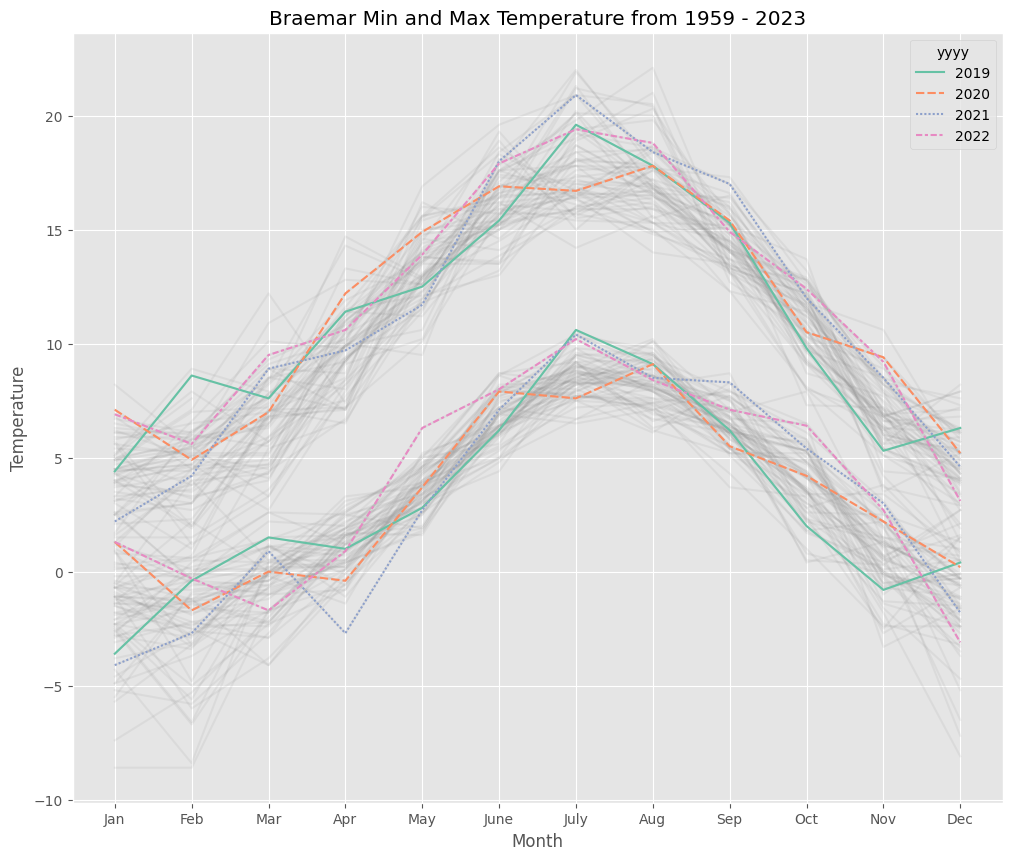

In [50]:
fig, ax = plt.subplots(figsize = (12,10))
sns.lineplot(data = braemar_df, 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = ALPHA, 
             ax = ax)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin([2022, 2021, 2020,2019])], 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             style = 'yyyy',
             palette = COLORS,
             ax = ax)

sns.lineplot(data = braemar_df, 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = ALPHA, 
             ax = ax)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin([2022, 2021, 2020,2019])], 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             style = 'yyyy',
             palette = COLORS,
             ax = ax)

ax.set_ylabel("Temperature")
ax.set_xlabel("Month")
ax.set_title("Braemar Min and Max Temperature from 1959 - 2023")

if SAVE:
    plt.savefig(Path(save_dir,
                     "min_max_lineplot.svg"), 
                     format = "svg", 
                     facecolor = 'white', 
                     dpi = 300)

In [51]:
braemar_df.head(1)

,yyyy,mm,tmax,tmin,af,rain,sun
0,1959,Jan,1.7,-5.7,27.0,NaN,34.2


In [52]:
braemar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yyyy    770 non-null    int64  
 1   mm      770 non-null    object 
 2   tmax    766 non-null    float64
 3   tmin    766 non-null    float64
 4   af      766 non-null    float64
 5   rain    743 non-null    float64
 6   sun     552 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 42.2+ KB


/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/4107081994.py:6: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/4107081994.py:15: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/4107081994.py:25: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/4107081994.py:34: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],
/var/folders/v6/dbfxlq956

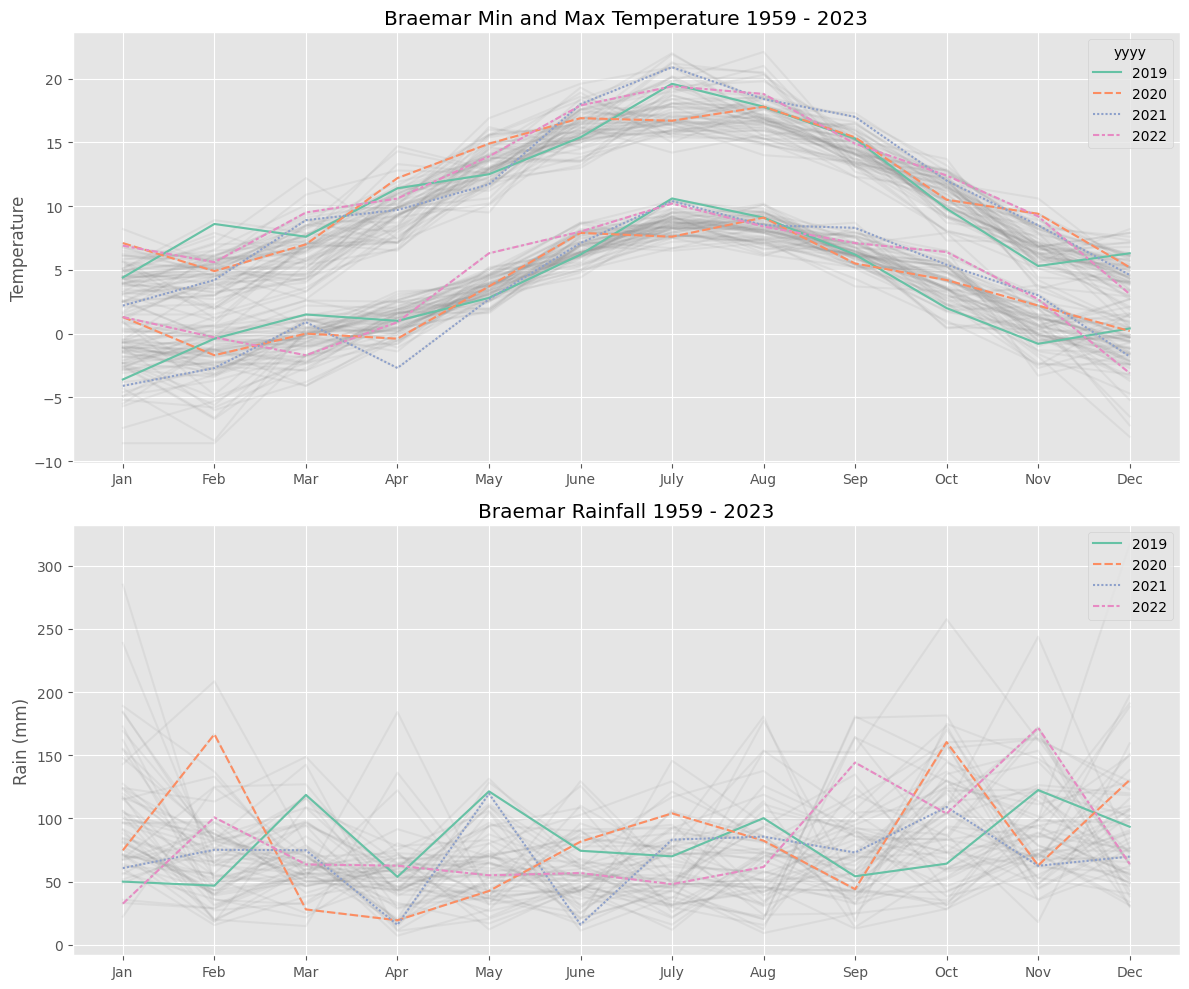

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize=(12, 10))

years = [2022,2021,2020,2019]
colours = sns.color_palette("tab10")
# tmax
sns.lineplot(data = braemar_df, 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.1, 
             ax = ax1)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             style = 'yyyy',
             palette = COLORS,
             ax = ax1)

#tmin

sns.lineplot(data = braemar_df, 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = ALPHA, 
             ax = ax1)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             style = 'yyyy',
             palette = COLORS,
             ax = ax1)

#Rain

sns.lineplot(data = braemar_df, 
             y = 'rain', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = ALPHA, 
             ax = ax2)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'rain', 
             x = 'mm', 
             hue = 'yyyy', 
             style = 'yyyy',
             palette = COLORS,
             ax = ax2)


ax1.set_ylabel("Temperature")
ax1.set_xlabel("")
ax1.set_title("Braemar Min and Max Temperature 1959 - 2023")

ax2.set_ylabel("Rain (mm)")
ax2.set_xlabel("")
ax2.set_title("Braemar Rainfall 1959 - 2023")
plt.legend(loc = 'upper right')

plt.tight_layout()
if SAVE:
    plt.savefig(Path(save_dir,
                     "min_max_rain_lineplot.svg"), 
                     format = "svg", 
                     facecolor = 'white', 
                     dpi = 300)

/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/4037065562.py:5: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/4037065562.py:14: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/4037065562.py:24: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/4037065562.py:33: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],


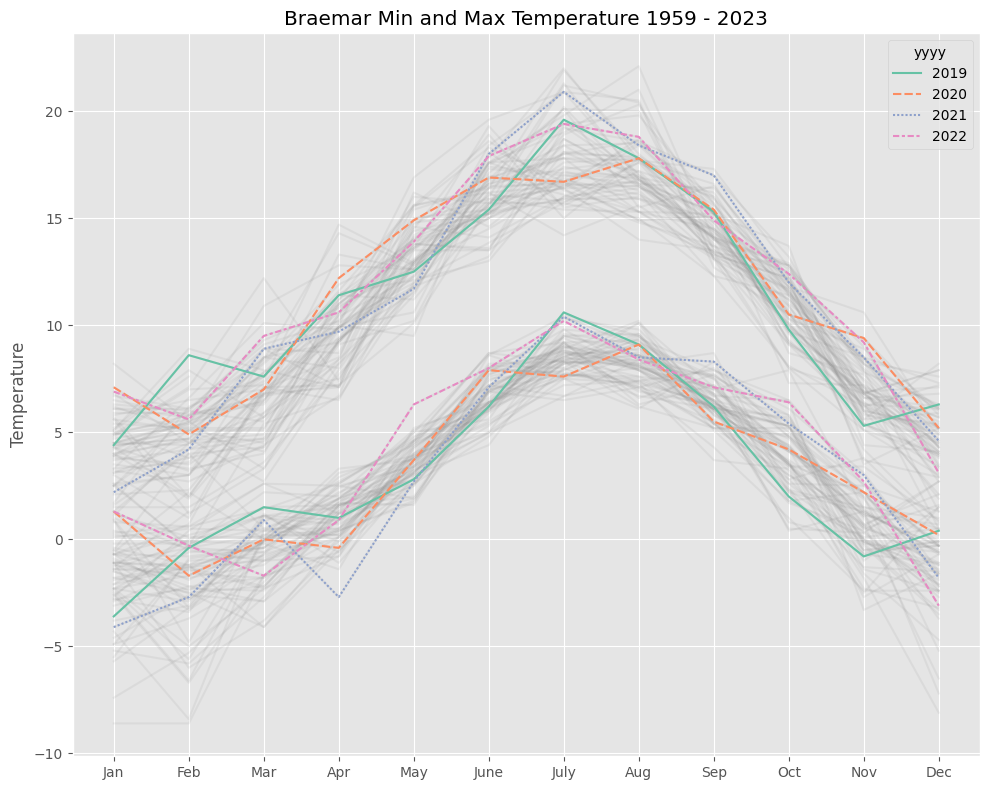

In [54]:
fig, ax1 = plt.subplots(ncols = 1, nrows = 1, figsize=(10, 8))

years = [2022,2021,2020,2019]
# tmax
sns.lineplot(data = braemar_df, 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = ALPHA, 
             ax = ax1)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             style = 'yyyy',
             palette = COLORS,
             ax = ax1)

#tmin

sns.lineplot(data = braemar_df, 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = ALPHA, 
             ax = ax1)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             style = 'yyyy',
             palette = COLORS,
             ax = ax1)



ax1.set_ylabel("Temperature")
ax1.set_xlabel("")
ax1.set_title("Braemar Min and Max Temperature 1959 - 2023")


plt.tight_layout()

if SAVE:
    plt.savefig(Path(save_dir,
                     "min_max_lineplot.svg"), 
                     format = "svg", 
                     facecolor = 'white', 
                     dpi = 300)

/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/1189231596.py:7: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/1189231596.py:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],


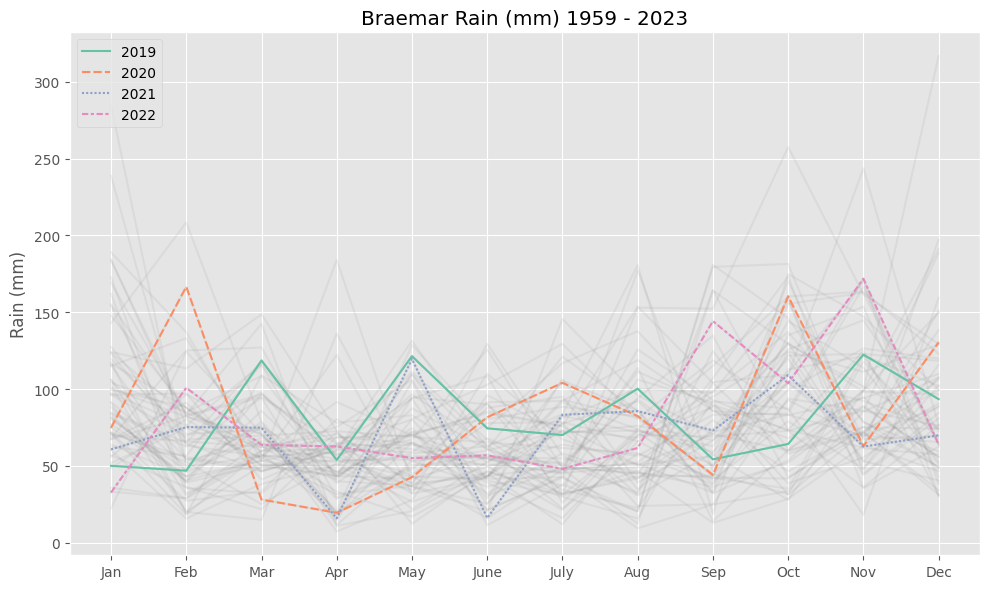

In [55]:
fig, ax1 = plt.subplots(ncols = 1, nrows = 1, figsize=(10, 6))

years = [2022,2021,2020,2019]

# tmax

sns.lineplot(data = braemar_df, 
             y = 'rain', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = ALPHA, 
             ax = ax1)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'rain', 
             x = 'mm', 
             hue = 'yyyy', 
             style = 'yyyy',
             palette = COLORS,
             ax = ax1)

ax1.set_ylabel("Rain (mm)")
ax1.set_xlabel("")
ax1.set_title("Braemar Rain (mm) 1959 - 2023")
plt.legend(loc = 'upper left')

plt.tight_layout()

if SAVE:
    plt.savefig(Path(save_dir,
                     "rain_lineplot.svg"), 
                     format = "svg", 
                     facecolor = 'white', 
                     dpi = 300)

In [56]:
monthly_avg_tmax = braemar_df.groupby('mm').mean()['tmax']
monthly_avg_tmin = braemar_df.groupby('mm').mean()['tmin']
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Doc"]
monthly_avg_tmax = monthly_avg_tmax.reindex(index = months).dropna()
monthly_avg_tmin = monthly_avg_tmin.reindex(index = months).dropna()

/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/1758537767.py:19: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/1758537767.py:26: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],


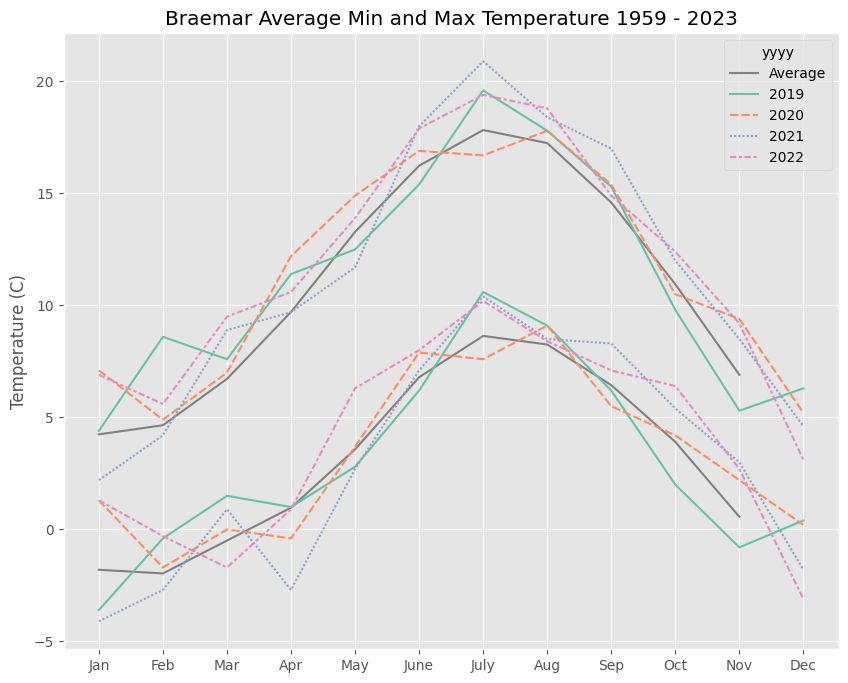

In [57]:
fig, ax = plt.subplots(figsize = (10,8))
# Averages
sns.lineplot(data = monthly_avg_tmax, 
             y = monthly_avg_tmax.values,
             x = monthly_avg_tmax.index,
             color = 'grey',
             legend = None,
             label = 'Average',
             ax = ax,)

sns.lineplot(data = monthly_avg_tmax, 
             y = monthly_avg_tmin.values,
             x = monthly_avg_tmin.index,
             color = 'grey',
             legend = None, 
             ax = ax)

# Years
sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette = COLORS,
             style = 'yyyy',
             ax = ax)
sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             style = 'yyyy',
             palette = COLORS,
             ax = ax)


ax.set_ylabel("Temperature (C)")
ax.set_xlabel("")
ax.set_title("Braemar Average Min and Max Temperature 1959 - 2023")
if SAVE:
    plt.savefig(Path(save_dir,
                     "min_max_average_lineplot.svg"), 
                     format = "svg", 
                     facecolor = 'white', 
                     dpi = 300)

In [58]:
braemar_years_tmax = braemar_df[braemar_df['yyyy'].isin(years)][['yyyy','mm','tmax']]

In [59]:
"""
This cell basically just finds the highest temps for each month, then 
finds the corresponding year this occured. There has to be a better way
to compare multiple columns across dataframes but I cant find it. 
"""
braemar_df['concat'] = (braemar_df['mm'].astype(str) + 
" " + braemar_df['tmax'].astype(str))
max_by_month = braemar_df.groupby('mm', as_index = False).max()[['mm', 'tmax']]
max_by_month['concat'] = max_by_month['mm'].astype(str) + " " + max_by_month['tmax'].astype(str)
max_by_month_list = max_by_month['concat'].to_list()
braemar_max_temp_year_month_df = braemar_df[braemar_df['concat'].isin(max_by_month_list)][['yyyy','mm','tmax']]

/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/4172676963.py:17: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(data = braemar_years_tmax,


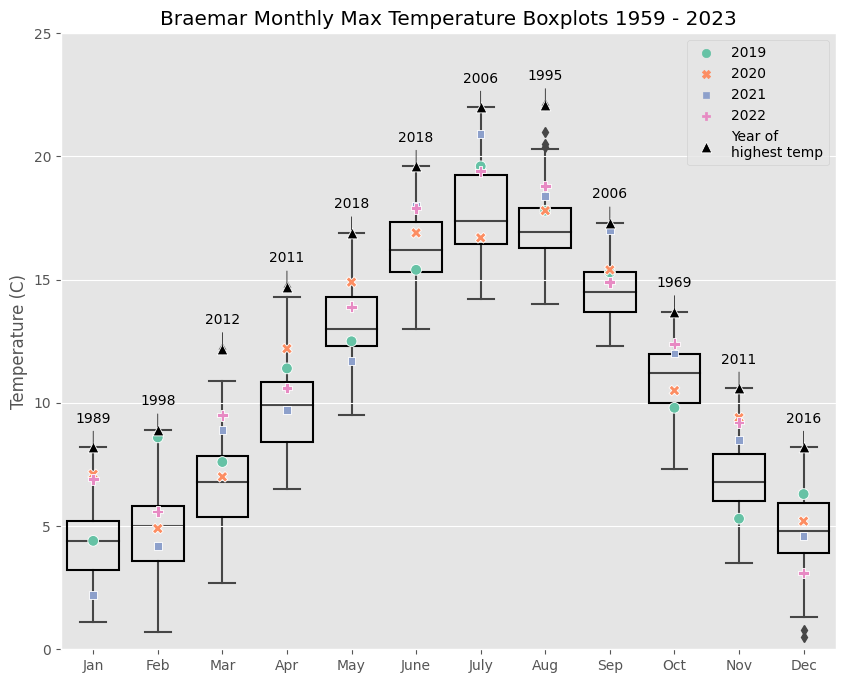

In [60]:
MARKERSIZE = 60

melted = braemar_df.melt(id_vars = 'mm', value_vars='tmax')
fig, ax = plt.subplots(figsize = (10,8))

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
}

sns.boxplot(data = melted,
            x = 'mm', 
            y = 'value',
            ax = ax,
            zorder = 0,
            **PROPS)

sns.scatterplot(data = braemar_years_tmax, 
                x = 'mm', 
                hue = 'yyyy',
                y = 'tmax', 
                style = 'yyyy',
                palette = COLORS,
                s =MARKERSIZE,
                zorder = 1)

sns.scatterplot(data = braemar_max_temp_year_month_df, 
                x = 'mm', 
                y = 'tmax', 
                color = 'black',
                label = 'Year of\nhighest temp',
                marker = "^",
                s = MARKERSIZE,
                zorder = 1)

arrowprops=dict(arrowstyle="-",color = 'black',
                            connectionstyle="arc3")

for i in range(len(braemar_max_temp_year_month_df)):
    ax.annotate(text = braemar_max_temp_year_month_df.iloc[i]['yyyy'], 
                xy = (braemar_max_temp_year_month_df.iloc[i]['mm'], 
                    braemar_max_temp_year_month_df.iloc[i]['tmax']), 
                xytext = (braemar_max_temp_year_month_df.iloc[i]['mm'], 
                    braemar_max_temp_year_month_df.iloc[i]['tmax']+1),
                arrowprops=arrowprops,
                ha='center'
                )

ax.set_ylabel("Temperature (C)")
ax.set_ylim(0,25)
ax.set_xlabel("")
ax.set_title("Braemar Monthly Max Temperature Boxplots 1959 - 2023")

if SAVE:
    plt.savefig(Path(save_dir,
                     "tmax_boxplot.svg"), 
                     format = "svg", 
                     facecolor = 'white', 
                     dpi = 300)

In [61]:
braemar_years_tmin = braemar_df[braemar_df['yyyy'].isin(years)][['yyyy','mm','tmin']]

In [62]:
"""
This cell basically just finds the lowest temps for each month, then 
finds the corresponding year this occured. There has to be a better way
to compare multiple columns across dataframes but I cant find it. 
"""
braemar_df['concat'] = (braemar_df['mm'].astype(str) + 
" " + braemar_df['tmin'].astype(str))
min_by_month = braemar_df.groupby('mm', as_index = False).min()[['mm', 'tmin']]
min_by_month['concat'] = min_by_month['mm'].astype(str) + " " + min_by_month['tmin'].astype(str)
min_by_month_list = min_by_month['concat'].to_list()
braemar_min_temp_year_month_df = braemar_df[braemar_df['concat'].isin(min_by_month_list)][['yyyy','mm','tmin']]

/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_32765/1612951630.py:15: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(data = braemar_years_tmin,


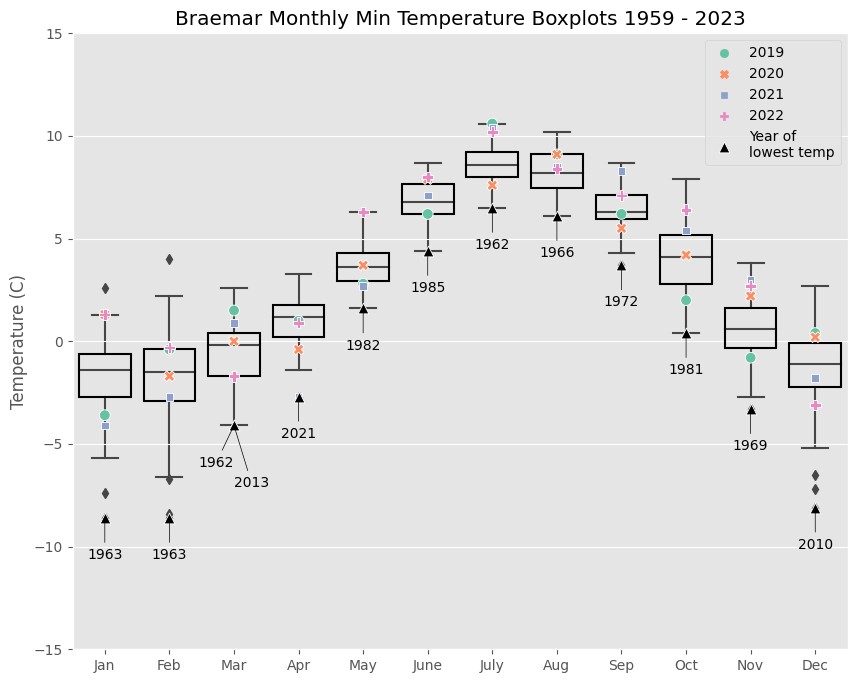

In [63]:
melted = braemar_df.melt(id_vars = 'mm', value_vars='tmin')
fig, ax = plt.subplots(figsize = (10,8))

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
}

sns.boxplot(data = melted,
            x = 'mm', 
            y = 'value',
            ax = ax,
            zorder = 0,
            **PROPS)

sns.scatterplot(data = braemar_years_tmin, 
                x = 'mm', 
                hue = 'yyyy',
                y = 'tmin', 
                palette = COLORS,
                style = 'yyyy',
                s = MARKERSIZE,
                zorder = 1)

sns.scatterplot(data = braemar_min_temp_year_month_df, 
                x = 'mm', 
                y = 'tmin', 
                color = 'black',
                label = 'Year of\nlowest temp',
                marker = "^",
                s = MARKERSIZE,
                zorder = 1)

arrowprops=dict(arrowstyle="-",color = 'black',
                            connectionstyle="arc3")

for i in range(len(braemar_min_temp_year_month_df)):
    if braemar_min_temp_year_month_df.iloc[i]['mm'] == 'Mar':
        pass
    else:
        ax.annotate(text = braemar_min_temp_year_month_df.iloc[i]['yyyy'], 
                xy = (braemar_min_temp_year_month_df.iloc[i]['mm'], 
                    braemar_min_temp_year_month_df.iloc[i]['tmin']), 
                xytext = (braemar_min_temp_year_month_df.iloc[i]['mm'], 
                    braemar_min_temp_year_month_df.iloc[i]['tmin']-2),
                arrowprops=arrowprops,
                ha='center'
                )

# Mar has two years with a min of -4.1
mar_min_df = braemar_min_temp_year_month_df[braemar_min_temp_year_month_df['mm'] == 'Mar']

ax.annotate(text = mar_min_df.iloc[0]['yyyy'], 
            xy = (mar_min_df.iloc[0]['mm'], 
                    mar_min_df.iloc[0]['tmin']), 
            xytext = (mar_min_df.iloc[0]['mm'], 
                    mar_min_df.iloc[0]['tmin']-2),
            arrowprops=arrowprops,
            ha='right'
                )

ax.annotate(text = mar_min_df.iloc[1]['yyyy'], 
            xy = (mar_min_df.iloc[1]['mm'], 
                    mar_min_df.iloc[1]['tmin']), 
            xytext = (mar_min_df.iloc[1]['mm'], 
                    mar_min_df.iloc[1]['tmin']-3),
            arrowprops=arrowprops,
            ha='left'
                )

ax.set_ylabel("Temperature (C)")
ax.set_ylim(-15,15)
ax.set_xlabel("")
ax.set_title("Braemar Monthly Min Temperature Boxplots 1959 - 2023")

if SAVE:
    plt.savefig(Path(save_dir,
                     "tmin_boxplot.svg"), 
                     format = "svg", 
                     facecolor = 'white', 
                     dpi = 300)

In [64]:
sun_months = ['Mar',
 'Feb',
 'Jan',
 'Doc',
 'Nov',
 'Oct',
 'Sep',
 'Aug',
 'July',
 'June',
 'May',
 'Apr',
 ]

braemar_sun_mean = braemar_df.groupby('mm', as_index = False).mean(numeric_only = True)[['mm', 'sun']]
braemar_sun_mean.index = braemar_sun_mean['mm']
braemar_sun_mean = braemar_sun_mean.reindex(sun_months).reset_index(drop = True).dropna()

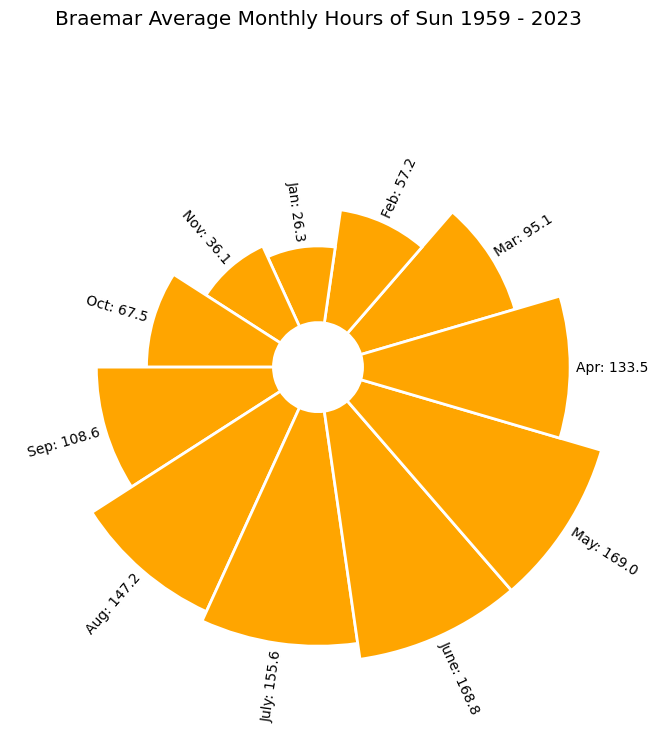

In [65]:
# set figure size
plt.figure(figsize=(16,8))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = braemar_sun_mean['sun'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * braemar_sun_mean['sun'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(braemar_sun_mean.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(braemar_sun_mean.index)+1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    color = 'orange', 
    linewidth=2, 
    edgecolor="white")

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label, value in zip(bars,angles, heights, braemar_sun_mean["mm"],
                                            braemar_sun_mean["sun"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label + ": " + str(round(value,1)), 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
ax.set_title("Braemar Average Monthly Hours of Sun 1959 - 2023")

if SAVE:
    plt.savefig(Path(save_dir,
                     "sunplot.svg"), 
                     format = "svg", 
                     facecolor = 'white', 
                     dpi = 300)

# Diff from average temp

In [66]:
def set_colour(df:pd.DataFrame, tmin_or_tmax:str) -> str:
    if df['diff'] < 0:
        return 'tab:blue'
    else:
        return 'tab:red'

In [67]:
tmax_yearly_avg = braemar_df.groupby('yyyy', as_index = False).mean(numeric_only = True)[['yyyy','tmax']]
mean_tmax = tmax_yearly_avg['tmax'].mean()
tmax_yearly_avg['diff'] = tmax_yearly_avg['tmax'] - mean_tmax
tmax_yearly_avg = tmax_yearly_avg[tmax_yearly_avg['yyyy'] != 2023]
tmax_yearly_avg['colour'] = tmax_yearly_avg.apply(lambda x: set_colour(x, 'tmax'), axis = 1)

In [68]:
tmin_yearly_avg = braemar_df.groupby('yyyy', as_index = False).mean(numeric_only = True)[['yyyy','tmin']]
mean_tmin = tmin_yearly_avg['tmin'].mean()
tmin_yearly_avg['diff'] = tmin_yearly_avg['tmin'] - mean_tmin
tmin_yearly_avg = tmin_yearly_avg[tmin_yearly_avg['yyyy'] != 2023]
tmin_yearly_avg['colour'] = tmin_yearly_avg.apply(lambda x: set_colour(x, 'tmin'), axis = 1)

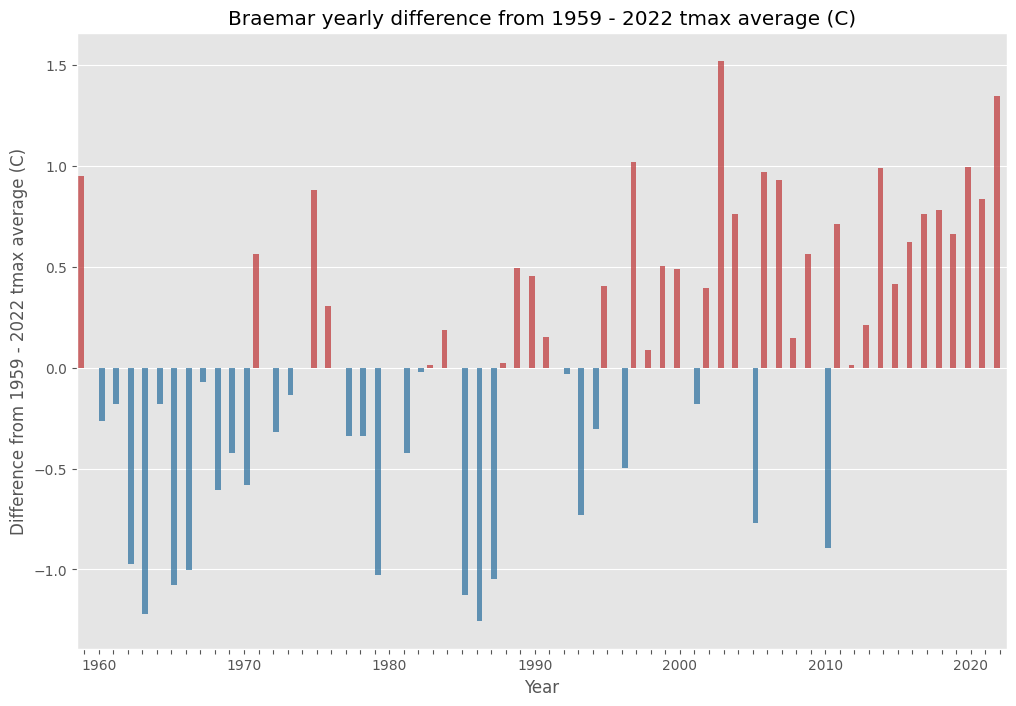

In [69]:
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=tmax_yearly_avg,
            x="yyyy", 
            y="diff", 
            hue = 'colour', 
            ax = ax,
            palette = tmin_yearly_avg['colour'], 
            alpha = 0.75)
ax.legend_.remove()
ticks_on = [1,11, 21, 31, 41,51, 61] #indices for 1960, 70, 1980, 90, 2000, 2010, 2020
for ind, label in enumerate(ax.get_xticklabels()):
    if ind in ticks_on:  
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set_ylabel("Difference from 1959 - 2022 tmax average (C)")
ax.set_xlabel("Year")
ax.set_title('Braemar yearly difference from 1959 - 2022 tmax average (C)')

if SAVE:
    plt.savefig(Path(save_dir,
                     "tmax_avg_diff.svg"), 
                     format = "svg", 
                     facecolor = 'white', 
                     dpi = 300)

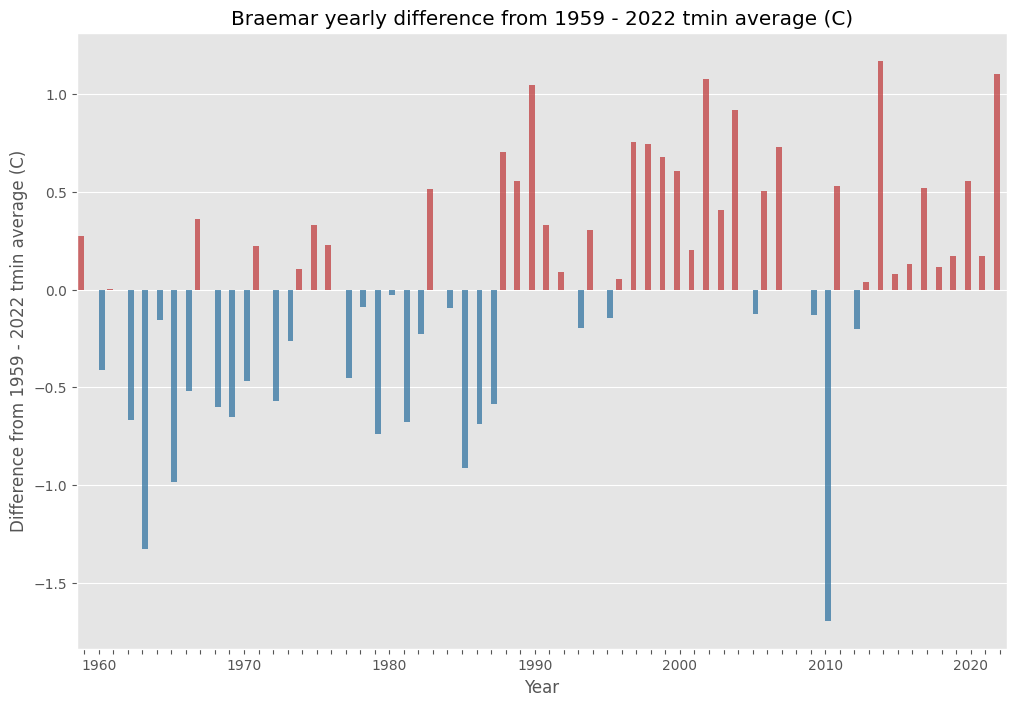

In [70]:
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=tmin_yearly_avg, 
            x="yyyy",
            y="diff",
            hue = 'colour', 
            ax = ax,
            palette = tmin_yearly_avg['colour'], 
            alpha = 0.75)
ax.legend_.remove()
ticks_on = [1,11, 21, 31, 41,51, 61] #indices for 1960, 70, 1980, 90, 2000, 2010, 2020
for ind, label in enumerate(ax.get_xticklabels()):
    if ind in ticks_on:  
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set_ylabel("Difference from 1959 - 2022 tmin average (C)")
ax.set_xlabel("Year")
ax.set_title('Braemar yearly difference from 1959 - 2022 tmin average (C)')

if SAVE:
    plt.savefig(Path(save_dir,
                     "tmin_avg_diff.svg"), 
                     format = "svg", 
                     facecolor = 'white', 
                     dpi = 300)